### Pandas & sklearn for Data Transformation

In [253]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stat
from sklearn.impute import KNNImputer
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.metrics import r2_score , mean_squared_error

In [308]:
#load data
df = pd.read_csv('E:/python/car_data.csv')

In [309]:
#head
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [310]:
#shape
df.shape

(6019, 12)

In [311]:
#set car-name as index
df = df.set_index('Name')

#### Data Pre-processing on Mileage, Engine, Power features to convert it into numeric

In [312]:
df['Engine']  = df['Engine'].apply(lambda x: str(x).replace('CC', '') if 'CC' in str(x) else str(x))
df['Power']   = df['Power'].apply(lambda x: str(x).replace('bhp', '') if 'bhp' in str(x) else str(x))
df['Mileage'] = df['Mileage'].apply(lambda x: str(x).replace('km/kg', '') if 'km/kg' in str(x) else str(x))
df['Mileage'] = df['Mileage'].apply(lambda x: str(x).replace('kmpl', '') if 'kmpl' in str(x) else str(x))

In [313]:
#renaming columns
df = df.rename(columns={'Engine': 'Engine (CC)','Power': 'Power (bhp)', 'Mileage': 'Mileage (kmpl)'})

In [314]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price
Name,,,,,,,,,,,
Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [315]:
df.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage (kmpl)        object
Engine (CC)           object
Power (bhp)           object
Seats                float64
Price                float64
dtype: object

In [316]:
df['Power (bhp)'] = df['Power (bhp)'].replace('null ', np.NaN)

In [317]:
df['Power (bhp)'] = df['Power (bhp)'].astype('float')
df['Engine (CC)'] = df['Engine (CC)'].astype('float')
df['Mileage (kmpl)'] = df['Mileage (kmpl)'].astype('float')

In [318]:
year = 2021

df['year_diff_from_2021'] = year - df['Year']
df.drop('Year',axis = 1, inplace = True)

In [319]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price,year_diff_from_2021
Name,,,,,,,,,,,
Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11
Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,6
Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10
Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,9
Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,8


## Feature Engineering
### missing value analysis

In [320]:
df.isnull().sum()

Location                 0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage (kmpl)           2
Engine (CC)             36
Power (bhp)            143
Seats                   42
Price                    0
year_diff_from_2021      0
dtype: int64

In [321]:
#imputing missing values
imputer = KNNImputer()
df[['Mileage (kmpl)','Engine (CC)','Power (bhp)']] = imputer.fit_transform(df[['Mileage (kmpl)','Engine (CC)','Power (bhp)']])

df.Seats = df.Seats.fillna(df.Seats.mode()[0])

In [322]:
df.isnull().sum()

Location               0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage (kmpl)         0
Engine (CC)            0
Power (bhp)            0
Seats                  0
Price                  0
year_diff_from_2021    0
dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Density'>

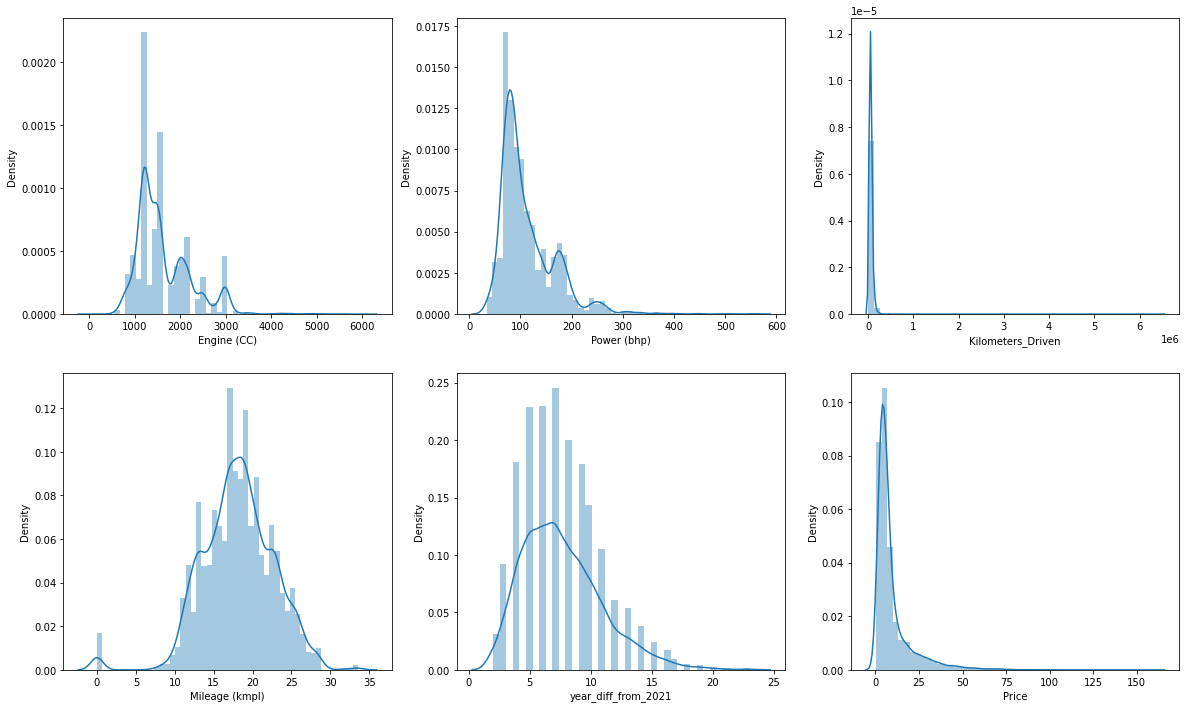

In [324]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.distplot(df['Engine (CC)'])

plt.subplot(2,3,2)
sns.distplot(df['Power (bhp)'])

plt.subplot(2,3,3)
sns.distplot(df['Kilometers_Driven'])

plt.subplot(2,3,4)
sns.distplot(df['Mileage (kmpl)'])

plt.subplot(2,3,5)
sns.distplot(df['year_diff_from_2021'])

plt.subplot(2,3,6)
sns.distplot(df.Price)


* As we can see fom distplot, data is not normally distributed it is skewed so , Transformation is required to convert it into a normal distribution except 'Mileage (kmpl)' feature. It follows normal distribution. we will treat the outliers present in this feature later.
### we will use feature transformation technique [logarithmic transformation]

In [325]:
df['Engine (CC)'] = np.log1p(df['Engine (CC)'])
df['Power (bhp)'] = np.log1p(df['Power (bhp)'])
df['Kilometers_Driven'] = np.log1p(df['Kilometers_Driven'])
df['year_diff_from_2021'] = np.log1p(df['year_diff_from_2021'])
df['Price'] = np.log(df['Price'])

In [326]:
def plot_data(df,feature):
    plt.figure(figsize=(8,5))
    plt.subplot(1,2,1)
    sns.distplot(df[feature])
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

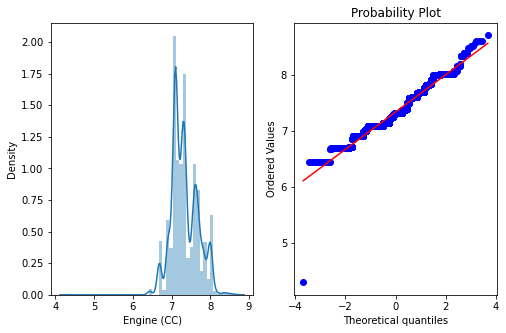

In [327]:
plot_data(df, 'Engine (CC)')

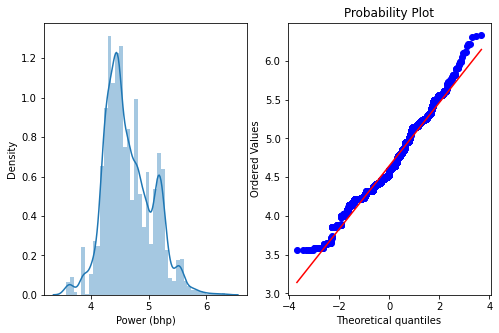

In [328]:
plot_data(df , 'Power (bhp)')

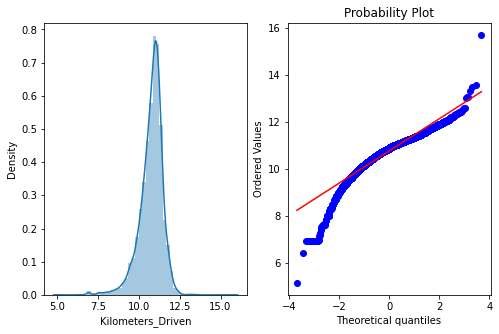

In [329]:
plot_data(df, 'Kilometers_Driven')

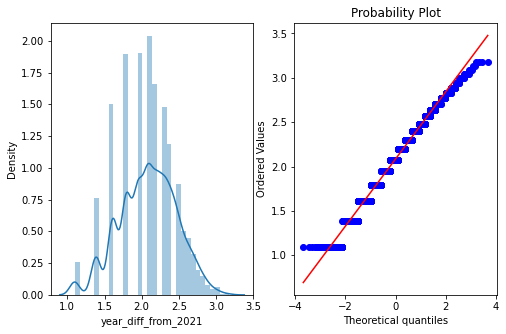

In [330]:
plot_data(df,'year_diff_from_2021')

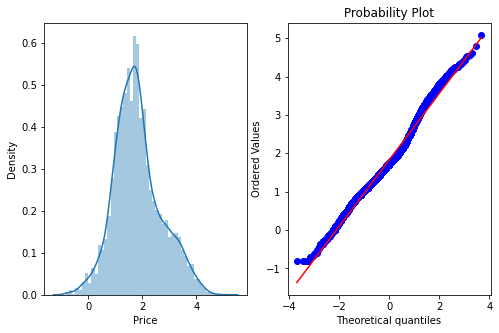

In [331]:
plot_data(df,'Price')

### let's remove outliers present in Mileage (kmpl) column
* For any car, mileage can not be 0 , so removing it

In [332]:
df = df.drop(df[df['Mileage (kmpl)']== 0].index, axis = 0)

<AxesSubplot:xlabel='Mileage (kmpl)', ylabel='Density'>

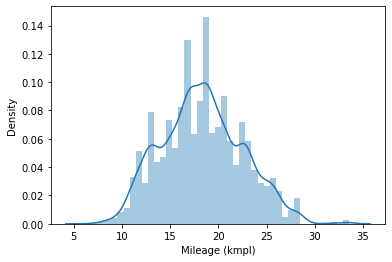

In [333]:
sns.distplot(df['Mileage (kmpl)'])

In [334]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price,year_diff_from_2021
Name,,,,,,,,,,,
Maruti Wagon R LXI CNG,Mumbai,11.184435,CNG,Manual,First,26.60,6.906755,4.080246,5.0,0.559616,2.484907
Hyundai Creta 1.6 CRDi SX Option,Pune,10.621352,Diesel,Manual,First,19.67,7.367077,4.845761,5.0,2.525729,1.945910
Honda Jazz V,Chennai,10.736418,Petrol,Manual,First,18.20,7.090077,4.496471,5.0,1.504077,2.397895
Maruti Ertiga VDI,Chennai,11.373675,Diesel,Manual,First,20.77,7.130099,4.497139,7.0,1.791759,2.302585
Audi A4 New 2.0 TDI Multitronic,Coimbatore,10.613271,Diesel,Automatic,Second,15.20,7.585281,4.954418,5.0,2.875822,2.197225


### Label Encoder for Ordinal Categories

In [335]:
df.Transmission.value_counts()

Manual       4254
Automatic    1695
Name: Transmission, dtype: int64

In [336]:
df.Owner_Type.value_counts()

First             4885
Second             947
Third              109
Fourth & Above       8
Name: Owner_Type, dtype: int64

In [337]:
le = LabelEncoder()
df[['Transmission','Owner_Type']] = df[['Transmission','Owner_Type']].apply(le.fit_transform)

### dummy variables for nominal categories

In [338]:
df = pd.get_dummies(df,columns = ['Fuel_Type','Location'],drop_first=True)

In [339]:
df.head()

,Kilometers_Driven,Transmission,Owner_Type,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price,year_diff_from_2021,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
Name,,,,,,,,,,,,,,,,,,,,,,,
Maruti Wagon R LXI CNG,11.184435,1,0,26.60,6.906755,4.080246,5.0,0.559616,2.484907,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Hyundai Creta 1.6 CRDi SX Option,10.621352,1,0,19.67,7.367077,4.845761,5.0,2.525729,1.945910,1,0,0,0,0,0,0,0,0,0,0,0,0,1
Honda Jazz V,10.736418,1,0,18.20,7.090077,4.496471,5.0,1.504077,2.397895,0,0,0,1,0,1,0,0,0,0,0,0,0,0
Maruti Ertiga VDI,11.373675,1,0,20.77,7.130099,4.497139,7.0,1.791759,2.302585,1,0,0,0,0,1,0,0,0,0,0,0,0,0
Audi A4 New 2.0 TDI Multitronic,10.613271,0,2,15.20,7.585281,4.954418,5.0,2.875822,2.197225,1,0,0,0,0,0,1,0,0,0,0,0,0,0


### Dataset is now ready for the Model building
#### train-test split

In [340]:
X = df.drop('Price',axis = 1)             #predictor variables
y = df.Price                              #target variable

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=21)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((4759, 22), (1190, 22), (4759,), (1190,))

### Feature Selection

<AxesSubplot:>

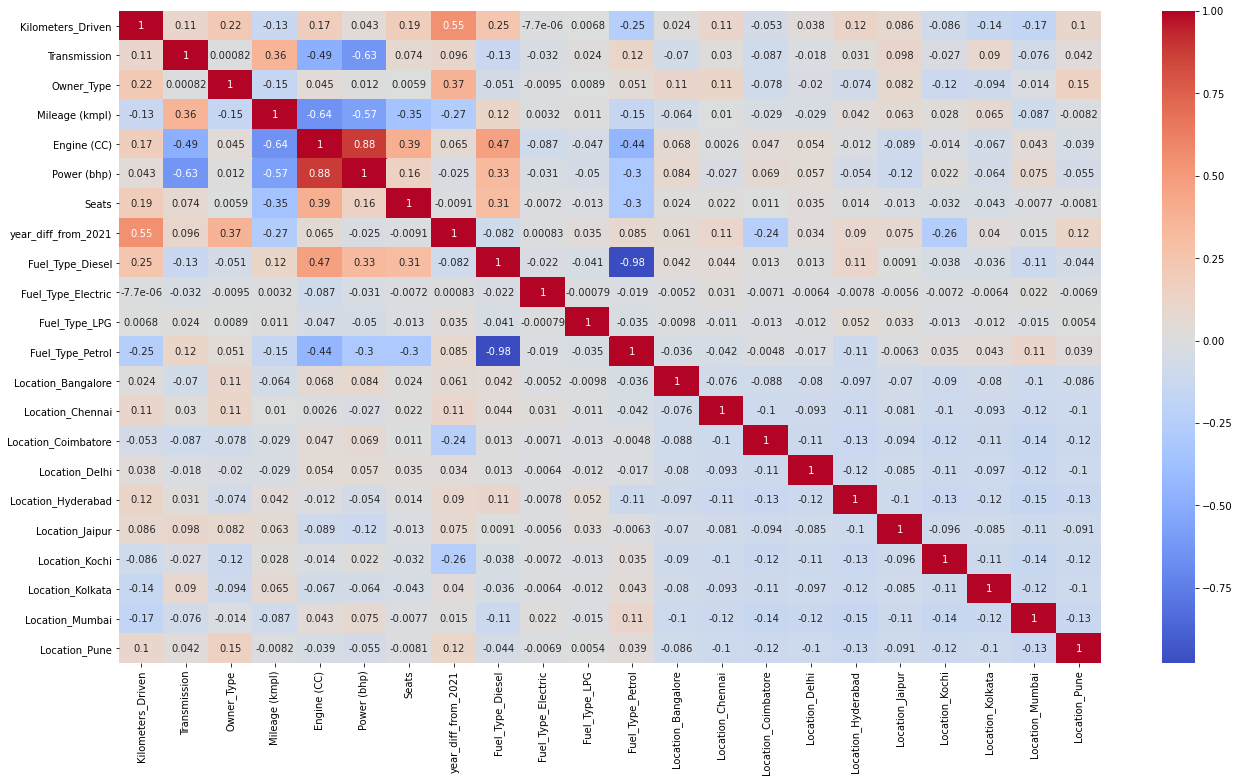

In [342]:
corr = X_train.corr()
plt.figure(figsize=(22,12))
sns.heatmap(corr,annot = True,cmap = 'coolwarm')

* Power (bhp) and Engine (CC) are highly positively correlated, so removing one of them #### (thresold > 0.8)

In [343]:
X_train.drop('Engine (CC)',axis = 1, inplace=True)
X_test.drop('Engine (CC)',axis = 1, inplace=True)

## Feature Scaling
### Standardization

In [344]:
scaler = StandardScaler()                    

X_train[['Mileage (kmpl)']] = scaler.fit_transform(X_train[['Mileage (kmpl)']])    #Mileage follows normal distribution

X_test[['Mileage (kmpl)']] = scaler.transform(X_test[['Mileage (kmpl)']])

## Model Building
### Random Forest

In [345]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=250,max_features='auto',random_state=21).fit(X_train, y_train)

In [346]:
pred  = rf.predict(X_test)

In [353]:
print('Accuracy =', r2_score(y_test,pred)*100)

Accuracy = 94.38144879739859


In [354]:
print('MSE =',mean_squared_error(y_test, pred))

MSE = 0.042080501050858095


In [351]:
#taking exp to predicted data so that we get it in a actual form
final_price = np.exp(pred)

In [358]:
final_price[:25]

array([ 4.77785499,  4.44852914,  2.91264342,  1.63009291,  6.88235084,
        3.91921437, 11.20947021,  3.60801747,  3.27334443,  9.82737965,
       11.05565725,  4.82360766, 20.53777269, 18.27800257,  9.03820518,
        5.13588552,  6.54429955, 34.36887535,  3.9343307 ,  3.44790078,
        1.60280086,  5.57438223, 50.8698126 ,  7.7473886 ,  2.50545975])

### Model Evaluation

In [355]:
pred_train = rf.predict(X_train)

In [356]:
print('Accuracy on train data =' , r2_score(y_train,pred_train)*100)

Accuracy on train data = 98.98814333368625


#### Model works well on train and test data, No overfitting problem